<a href="https://colab.research.google.com/github/MerveKaragulTabas/DL--Deep-Learning/blob/main/DL_S10_(Univariate_Time_Series_with_RNN_RSCCASN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part -1<br><br>Univariate Time Series Forecasting with RNN<br><br>RSCCASN<br><h1>

# RNN (Time Series)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [ ]:
df = pd.read_csv('RSCCASN.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [ ]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [ ]:
df.columns = ['Sales']

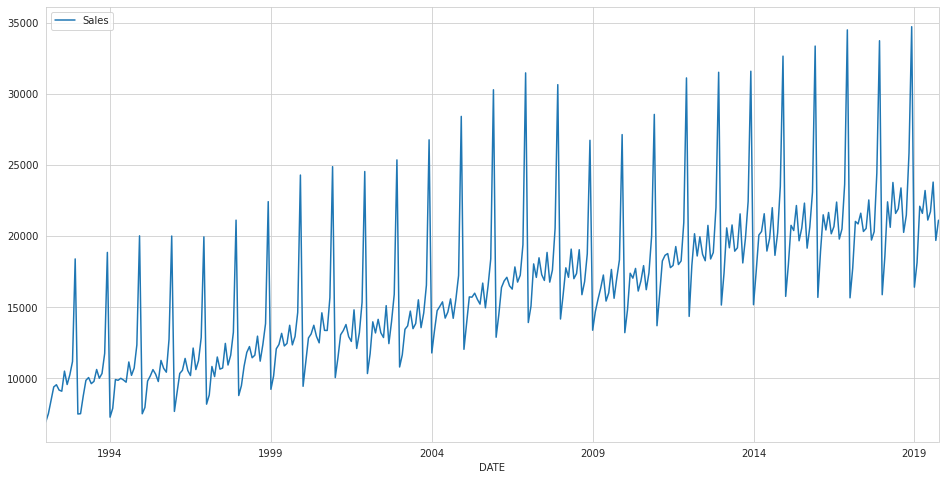

In [ ]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [ ]:
len(df)

334

In [ ]:
test_size = 24

In [ ]:
test_ind = len(df)- test_size
test_ind

310

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [ ]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# help(TimeseriesGenerator)

In [ ]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [ ]:
len(generator)

298

In [ ]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]), array([[0.02047633]]))

In [ ]:
X, y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


## Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
n_features = train_scaled.shape[1]

In [ ]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*32+(32**2))

4352

In [ ]:
4 * ((32+1)*16+(16**2))

3136

### EarlyStopping and Validation Generator

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [ ]:
len(validation_generator)

12

In [ ]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
298/298 [==============================] - 8s 14ms/step - loss: 0.0195 - val_loss: 0.0251
Epoch 2/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0181 - val_loss: 0.0347
Epoch 3/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0180 - val_loss: 0.0386
Epoch 4/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0173 - val_loss: 0.0239
Epoch 5/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0179 - val_loss: 0.0304
Epoch 6/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0174 - val_loss: 0.0226
Epoch 7/20
298/298 [==============================] - 3s 12ms/step - loss: 0.0170 - val_loss: 0.0220
Epoch 8/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0160 - val_loss: 0.0489
Epoch 9/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0156 - val_loss: 0.0216
Epoch 10/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0152 - val_lo

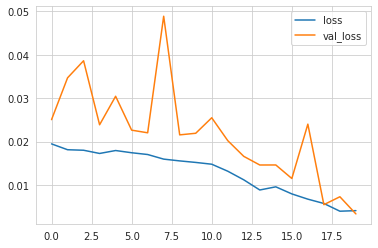

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [ ]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [ ]:
predictions_scaled

[array([0.7785442], dtype=float32),
 array([1.044909], dtype=float32),
 array([0.35367668], dtype=float32),
 array([0.4443404], dtype=float32),
 array([0.54228115], dtype=float32),
 array([0.5357372], dtype=float32),
 array([0.54044783], dtype=float32),
 array([0.5035195], dtype=float32),
 array([0.51951236], dtype=float32),
 array([0.5501299], dtype=float32),
 array([0.49958044], dtype=float32),
 array([0.60771775], dtype=float32)]

In [ ]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.8337345279355008 
mae: 0.049217285801715964 
mse: 0.003682352146432291 
rmse: 0.060682387448355156


### Inverse Transformations and Comparing

In [ ]:
predictions = scaler.inverse_transform(predictions_scaled)

In [ ]:
compare = test[:12]

In [ ]:
compare['Predictions'] = predictions

In [ ]:
compare

,Sales,Predictions
DATE,,
2017-11-01,24438,28382.221
2017-12-01,33720,35718.974
2018-01-01,15881,16679.670
2018-02-01,18585,19176.912
2018-03-01,22404,21874.592
2018-04-01,20616,21694.346
2018-05-01,23764,21824.095
2018-06-01,21589,20806.940
2018-07-01,21919,21247.448


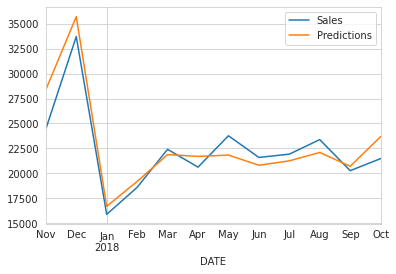

In [ ]:
compare.plot()

In [ ]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.833734527935501 
mae: 1355.6409201224642 
mse: 2793697.23196754 
rmse: 1671.4356798774938


## Retrain and Forecasting

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [ ]:
len(df)

334

In [ ]:
len(generator)

322

In [ ]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 7s 11ms/step - loss: 0.0238
Epoch 2/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0193
Epoch 3/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0179
Epoch 4/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0207
Epoch 5/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0180
Epoch 6/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0169
Epoch 7/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0159
Epoch 8/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0156
Epoch 9/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0134
Epoch 10/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0137
Epoch 11/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0125
Epoch 12/15
322/322 [==============================] - 3s 11ms/step - loss: 0.0117
Epoch 13/15
3

In [ ]:
scaled_full_data.shape

(334, 1)

In [ ]:
scaled_full_data[-length:].shape

(12, 1)

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[26484.49397898],
       [33397.99822235],
       [17148.49025202],
       [19124.85885763],
       [22017.79369116],
       [21846.97121048],
       [22729.53843069],
       [21140.75260258],
       [21610.09947205],
       [22147.93359852],
       [19197.79279542],
       [21409.41847801]])

In [ ]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [ ]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [ ]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [ ]:
forecast_df

,Forecast
2019-11-01,26484.494
2019-12-01,33397.998
2020-01-01,17148.490
2020-02-01,19124.859
2020-03-01,22017.794
2020-04-01,21846.971
2020-05-01,22729.538
2020-06-01,21140.753
2020-07-01,21610.099
2020-08-01,22147.934


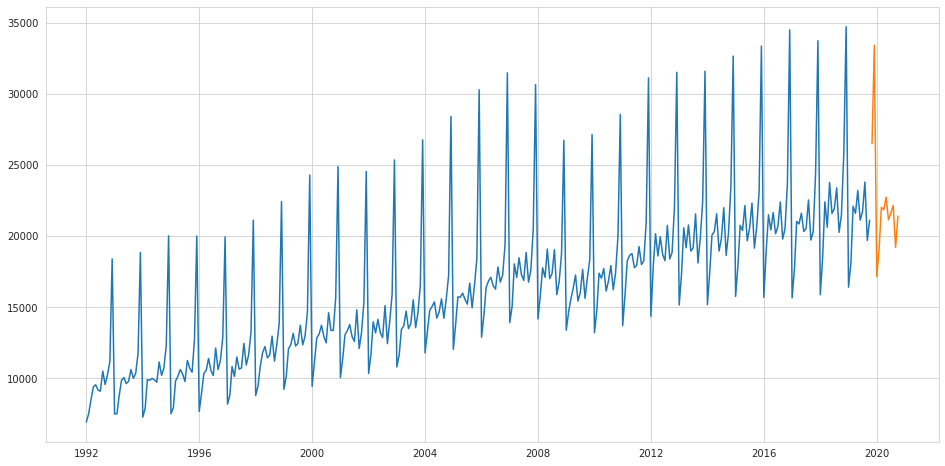

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

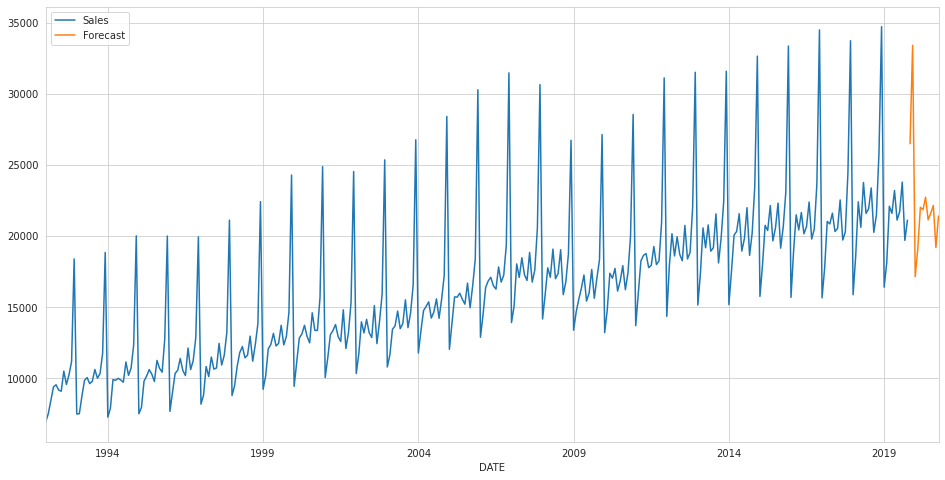

In [ ]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

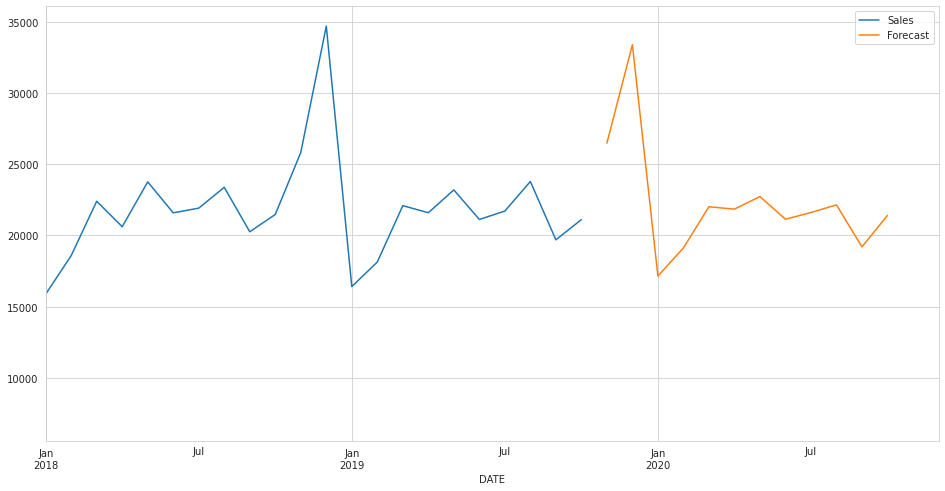

In [ ]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___